In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/MyProjects/ChineseMNIST/Data.zip'

In [4]:
import csv

# CSV file path
csv_file_path = "/content/chinese_mnist.csv"  # Update with your CSV file path

# Dictionary to store image labels indexed by image path
images = {}

# Read image labels from CSV file
with open(csv_file_path, mode='r') as file:
    reader = csv.DictReader(file)

    # Iterate through each row in the CSV file
    for row in reader:
        # Extract image path and label
        image_path = f"/content/data/data/input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg"
        label = {
            "suite_id": row["suite_id"],
            "sample_id": row["sample_id"],
            "code": row["code"],
            "value": row["value"],
            "character": row["character"]
        }

        # Store label in the dictionary indexed by image path
        images[image_path] = label

In [5]:
Data=[]
Labels=[]
for image,label in images.items():
  Data.append(plt.imread(image))
  Labels.append(label["value"])

label_encoder = LabelEncoder()
Labels = label_encoder.fit_transform(Labels)

Label:  14


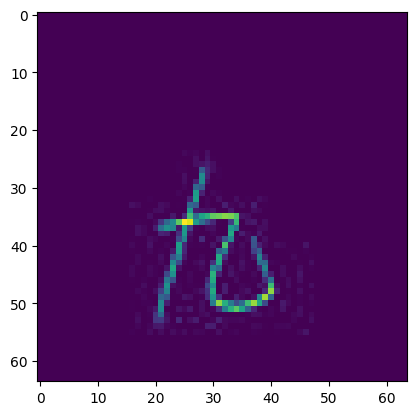

In [6]:
# Display the image
plt.imshow(Data[787])
print("Label: ",Labels[787])

In [7]:
print("Data Lenth : ",len(Data))
print("image size : ",len(Data[0]))

Data Lenth :  15000
image size :  64


In [8]:
X_train, x_test, Y_train, y_test = train_test_split(Data, Labels, test_size=0.33, random_state=42)

In [9]:
X_train = np.array([np.expand_dims(image, axis=-1) for image in X_train])

x_test = np.array([np.expand_dims(image, axis=-1) for image in x_test])

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64,64,1)),
    tf.keras.layers.Conv2D(64,3,activation='relu',padding="same"),
    tf.keras.layers.Conv2D(32,3,activation='relu',padding="same"),
    tf.keras.layers.Conv2D(16,3,activation='relu',padding="same"),
    tf.keras.layers.Conv2D(8,3,activation='relu',padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(15,activation='softmax')
])

In [11]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

In [12]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


315/315 [==============================] - 11s 16ms/step - loss: 1.0049 - accuracy: 0.6787 - val_loss: 0.4452 - val_accuracy: 0.8523
Epoch 2/10
315/315 [==============================] - 4s 14ms/step - loss: 0.2415 - accuracy: 0.9240 - val_loss: 0.2501 - val_accuracy: 0.9143
Epoch 3/10
315/315 [==============================] - 4s 12ms/step - loss: 0.1139 - accuracy: 0.9644 - val_loss: 0.2238 - val_accuracy: 0.9291
Epoch 4/10
315/315 [==============================] - 4s 13ms/step - loss: 0.0813 - accuracy: 0.9737 - val_loss: 0.2771 - val_accuracy: 0.9238
Epoch 5/10
315/315 [==============================] - 4s 14ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.2760 - val_accuracy: 0.9238
Epoch 6/10
315/315 [==============================] - 4s 13ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.2428 - val_accuracy: 0.9323
Epoch 7/10
315/315 [==============================] - 4s 13ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.2714 - val_accuracy: 0.9305
Epoch 8/1

In [13]:
_,accuracy=model.evaluate(x_test,y_test)
print('Accuracy=%2f'%(accuracy*100))

155/155 [==============================] - 1s 5ms/step - loss: 0.2664 - accuracy: 0.9289
Accuracy=92.888892


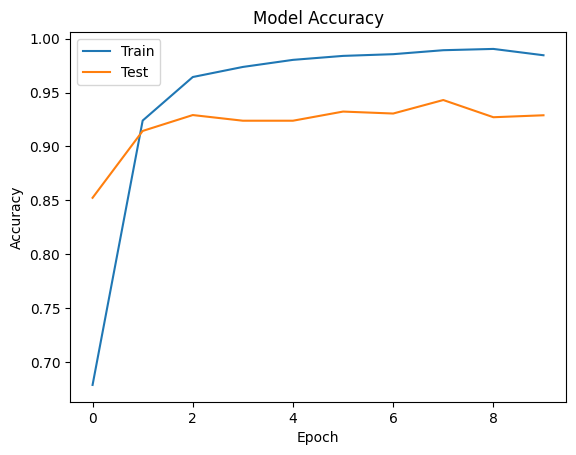

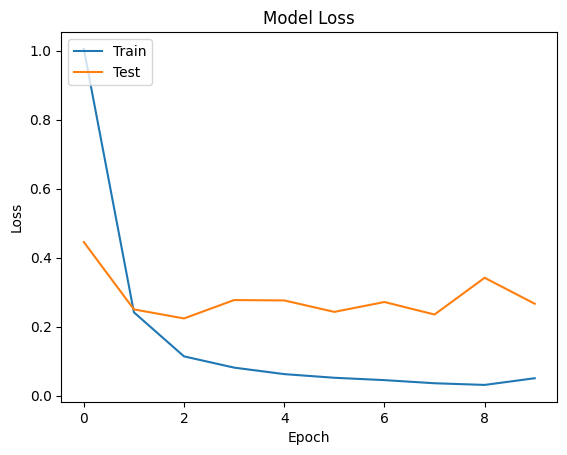

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()